<a href="https://colab.research.google.com/github/UthraCG/Time-series-Analysis-for-gold-rate/blob/main/Goldratefor10years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path='/content/Refined Gold Futures Historical Data (2).csv'
df=pd.read_csv(path)

In [ ]:
df.head().T

,0,1,2,3,4
Date,03-09-2024,02-09-2024,30-08-2024,29-08-2024,28-08-2024
Price,"72,000.00","72,774.00","72,774.00","73,022.00","72,534.00"
Open,"72,060.00","72,774.00","72,790.00","73,022.00","72,534.00"
High,"72,060.00","72,774.00","72,839.00","73,022.00","72,534.00"
Low,"72,000.00","72,774.00","72,540.00","73,022.00","72,534.00"
Vol.,0.00K,NaN,0.01K,0.00K,0.00K
Change %,-1.06%,0.00%,-0.34%,0.67%,-0.41%


In [ ]:
df.tail().T

,2735,2736,2737,2738,2739
Date,07-01-2014,06-01-2014,03-01-2014,02-01-2014,01-01-2014
Price,"28,035.00","28,204.00","28,152.00","27,754.00","27,502.00"
Open,"28,227.00","28,216.00","27,990.00","27,620.00","27,590.00"
High,"28,261.00","28,320.00","28,234.00","27,900.00","27,590.00"
Low,"28,020.00","28,140.00","27,931.00","27,620.00","27,464.00"
Vol.,0.05K,0.05K,0.03K,0.02K,0.02K
Change %,-0.60%,0.18%,1.43%,0.92%,-0.34%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2740 non-null   object
 1   Price     2740 non-null   object
 2   Open      2740 non-null   object
 3   High      2740 non-null   object
 4   Low       2740 non-null   object
 5   Vol.      1594 non-null   object
 6   Change %  2740 non-null   object
dtypes: object(7)
memory usage: 150.0+ KB


In [ ]:
df['Price']=df['Price'].str.replace(',','')
df['Open']=df['Open'].str.replace(',','')
df['High']=df['High'].str.replace(',','')
df['Low']=df['Low'].str.replace(',','')
df['Price'] = df['Price'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2740 non-null   object 
 1   Price     2740 non-null   float64
 2   Open      2740 non-null   float64
 3   High      2740 non-null   float64
 4   Low       2740 non-null   float64
 5   Vol.      1594 non-null   object 
 6   Change %  2740 non-null   object 
dtypes: float64(4), object(3)
memory usage: 150.0+ KB


In [ ]:
df.drop('Change %',axis=1,inplace=True)
df.drop('Vol.',axis=1,inplace=True)

In [ ]:
df['Rate in gm(24)']=df['Price']/10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2740 non-null   object 
 1   Price           2740 non-null   float64
 2   Open            2740 non-null   float64
 3   High            2740 non-null   float64
 4   Low             2740 non-null   float64
 5   Change %        2740 non-null   object 
 6   Rate in gm(24)  2740 non-null   float64
dtypes: float64(5), object(2)
memory usage: 150.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2740.0,40610.459854,13400.801375,24900.0,29096.250,33102.50,50907.250,75188.0
Open,2740.0,40609.550730,13400.545193,24929.0,29099.750,33100.50,50853.250,75380.0
High,2740.0,40682.674088,13423.386099,24992.0,29176.000,33120.00,50926.000,75380.0
Low,2740.0,40534.591971,13375.581826,24880.0,29033.750,33074.50,50823.250,74940.0
Rate in gm(24),2740.0,4061.045985,1340.080137,2490.0,2909.625,3310.25,5090.725,7518.8


#Visualizing Data


In [ ]:
fig=px.line(df,x='Date',y='Rate in gm(24)',title='Gold Price')
fig.update_xaxes(autorange="reversed")
fig.show()

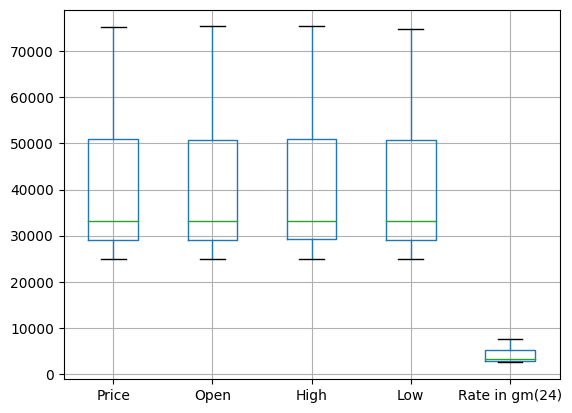

In [ ]:
df.boxplot()
plt.show()

In [ ]:
df_max=df.sort_values(by=['Rate in gm(24)'], ascending=False).head(50)
df_max

,Date,Price,Open,High,Low,Change %,Rate in gm(24)
33,17-07-2024,75188.0,75380.0,75380.0,74884.0,0.53%,7518.8
32,18-07-2024,75170.0,75209.0,75274.0,74940.0,-0.02%,7517.0
74,21-05-2024,74796.0,74500.0,74932.0,74438.0,0.18%,7479.6
34,16-07-2024,74791.0,74340.0,74945.0,74340.0,0.76%,7479.1
75,20-05-2024,74661.0,74905.0,74905.0,74453.0,0.55%,7466.1
76,17-05-2024,74256.0,73584.0,74405.0,73584.0,0.43%,7425.6
35,15-07-2024,74227.0,74018.0,74382.0,73800.0,0.54%,7422.7
31,19-07-2024,73971.0,74514.0,74540.0,73850.0,-1.60%,7397.1
77,16-05-2024,73940.0,73894.0,74013.0,73731.0,0.78%,7394.0
37,11-07-2024,73920.0,73710.0,74100.0,73710.0,0.71%,7392.0


In [ ]:
fig_max=px.scatter(df_max,x='Date',y='Rate in gm(24)',title='Gold Price with Max Range',color='Date')
fig_max.update_xaxes(autorange="reversed")
fig_max.show()

In [ ]:
px.histogram(df,x='Rate in gm(24)',title='Gold Price Histogram')

In [ ]:
df.duplicated().sum()

0

#Time Date Handling

In [ ]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
df

,Date,Price,Open,High,Low,Change %,Rate in gm(24),day,month,year
0,03-09-2024,72000.0,72060.0,72060.0,72000.0,-1.06%,7200.0,9,3,2024
1,02-09-2024,72774.0,72774.0,72774.0,72774.0,0.00%,7277.4,9,2,2024
2,30-08-2024,72774.0,72790.0,72839.0,72540.0,-0.34%,7277.4,30,8,2024
3,29-08-2024,73022.0,73022.0,73022.0,73022.0,0.67%,7302.2,29,8,2024
4,28-08-2024,72534.0,72534.0,72534.0,72534.0,-0.41%,7253.4,28,8,2024
...,...,...,...,...,...,...,...,...,...,...
2735,07-01-2014,28035.0,28227.0,28261.0,28020.0,-0.60%,2803.5,1,7,2014
2736,06-01-2014,28204.0,28216.0,28320.0,28140.0,0.18%,2820.4,1,6,2014
2737,03-01-2014,28152.0,27990.0,28234.0,27931.0,1.43%,2815.2,1,3,2014
2738,02-01-2014,27754.0,27620.0,27900.0,27620.0,0.92%,2775.4,1,2,2014


In [ ]:
for i in range(2014,2025):
  df_y=df[df['year']==i]
  fig_m=px.scatter(df_y,x='Date',y='Rate in gm(24)',title='Monthly Analysis of Gold Price')
  fig_m.update_xaxes(autorange="reversed")
  fig_m.show()

In [ ]:
df.drop('Date',axis=1,inplace=True)

#EDA Process


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           2740 non-null   float64
 1   Open            2740 non-null   float64
 2   High            2740 non-null   float64
 3   Low             2740 non-null   float64
 4   Rate in gm(24)  2740 non-null   float64
 5   day             2740 non-null   int32  
 6   month           2740 non-null   int32  
 7   year            2740 non-null   int32  
dtypes: float64(5), int32(3)
memory usage: 139.3 KB


In [ ]:
df.corr()

,Price,Open,High,Low,Rate in gm(24),day,month,year
Price,1.000000,0.999894,0.999922,0.999934,1.000000,0.002546,-0.003562,0.933805
Open,0.999894,1.000000,0.999929,0.999901,0.999894,0.002620,-0.003122,0.933708
High,0.999922,0.999929,1.000000,0.999820,0.999922,0.002899,-0.005227,0.933352
Low,0.999934,0.999901,0.999820,1.000000,0.999934,0.002120,-0.001537,0.934146
Rate in gm(24),1.000000,0.999894,0.999922,0.999934,1.000000,0.002546,-0.003562,0.933805
day,0.002546,0.002620,0.002899,0.002120,0.002546,1.000000,-0.002960,-0.013155
month,-0.003562,-0.003122,-0.005227,-0.001537,-0.003562,-0.002960,1.000000,-0.035398
year,0.933805,0.933708,0.933352,0.934146,0.933805,-0.013155,-0.035398,1.000000


<Axes: >

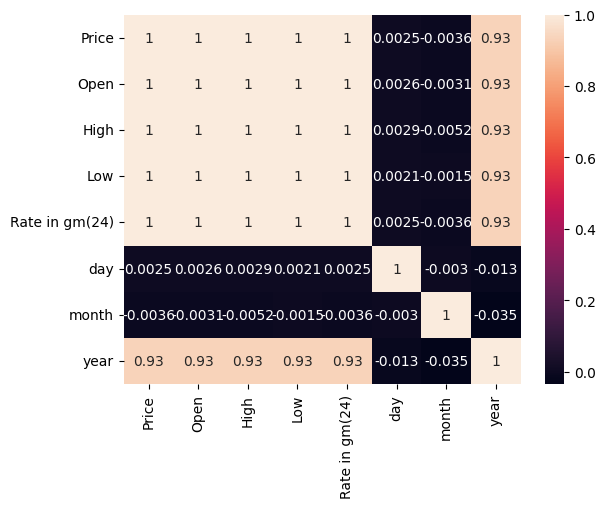

In [ ]:
fig_corr=sns.heatmap(df.corr(),annot=True)
fig_corr

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_s=pd.DataFrame(scaler.transform(df))

In [ ]:
df_s

,0,1,2,3,4,5,6,7
0,2.342790,2.347381,2.337939,2.352881,2.342790,-0.750977,-1.011553,1.669527
1,2.400559,2.400672,2.391139,2.410758,2.400559,-0.750977,-1.303737,1.669527
2,2.400559,2.401867,2.395982,2.393260,2.400559,1.619099,0.449366,1.669527
3,2.419068,2.419183,2.409618,2.429303,2.419068,1.506238,0.449366,1.669527
4,2.382646,2.382760,2.373257,2.392812,2.382646,1.393377,0.449366,1.669527
...,...,...,...,...,...,...,...,...
2735,-0.938582,-0.924202,-0.925545,-0.935801,-0.938582,-1.653863,0.157182,-1.574802
2736,-0.925969,-0.925023,-0.921148,-0.926827,-0.925969,-1.653863,-0.135002,-1.574802
2737,-0.929850,-0.941891,-0.927556,-0.942456,-0.929850,-1.653863,-1.011553,-1.574802
2738,-0.959555,-0.969507,-0.952443,-0.965711,-0.959555,-1.653863,-1.303737,-1.574802


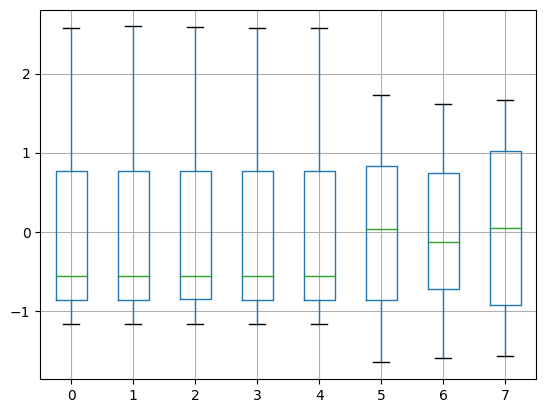

In [ ]:
df_s.boxplot()
plt.show()

In [ ]:
fig_sca=px.scatter(df,y='Rate in gm(24)',x='day',color='month')
fig_sca.show()

#Clustering

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans = kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
all_wcss=[]
for i in range(1,6):
  model=KMeans(i)
  model.fit(df)
  all_wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

In [ ]:
fig_c=px.scatter(range(1,6),all_wcss)
fig_c.update_traces(mode="lines+markers")
fig_c.show()

In [ ]:
labels = pd.DataFrame(kmeans.labels_)
labels
df['labels']=labels


In [ ]:
df['labels'].value_counts()

,count
labels,
4,1399
2,688
1,322
0,203
3,128


In [ ]:
df.labels. unique()

array([3, 1, 2, 0, 4], dtype=int32)

In [ ]:
fig_c=px.scatter(df,x='day',y='Rate in gm(24)',color='labels')
fig_c.show()